In [17]:
import os
import glob
import time
import argparse
import numpy as np
import seaborn as sns
from tqdm import tqdm
from collections import Counter
from ctokenizer import CTokenizer
from matplotlib import pyplot as plt
from gensim.models.doc2vec import Doc2Vec

In [23]:
BASE_PATH = "../datasets/programming_data/src/B2016/Z1/Z1/"
FILE_RE   = "*.cpp"
OUT_PATH  = "results_actual.csv"
MODEL_PATH = "models/d2v_cpp.h5"

In [24]:
model = Doc2Vec.load(MODEL_PATH)

In [25]:
embeddings = []
problematic_files = []
for filepath in tqdm(glob.glob(os.path.join(BASE_PATH, FILE_RE))):
    t = CTokenizer(filepath)
    tokens = t.rawTokenization()
    v = model.infer_vector(tokens)
    if len(v) > 0:
        embeddings.append(v)
    else:
        # Files which result in empty tokens
        problematic_files.append(filepath)

100%|██████████| 729/729 [05:33<00:00,  2.18it/s]


In [26]:
# Show problematic files
if len(problematic_files) > 0:
    print("The following files have some problem: ")
    for pf in problematic_files:
        print(pf)

In [27]:
N_DOCS = len(embeddings)
# To numpy array
embeddings = np.array(embeddings)
# Normalize the embeddings:
embeddings = embeddings/np.reshape(np.linalg.norm(embeddings, axis=1), (N_DOCS, 1))
csm = embeddings@embeddings.T

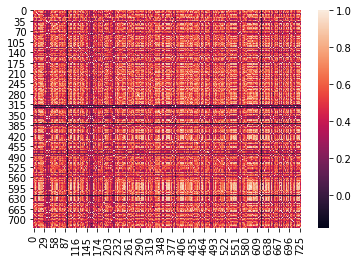

<Figure size 432x288 with 0 Axes>

In [28]:
# Dump results into a CSV file
np.savetxt("results/cosine_" + OUT_PATH, csm, fmt="%.4f", delimiter=',')

# Cosine Heatmap
chm = sns.heatmap(csm)
fig1 = chm.get_figure()
fig1.savefig("plots/cpp/cosine_heatmap_actual.png", dpi=150)   
plt.figure()
plt.show()